# Operations on Word Vectors

Welcome to your first assignment of Week 2, Course 5 of the Deep Learning Specialization! 

Because word embeddings are very computationally expensive to train, most ML practitioners will load a pre-trained set of embeddings. In this notebook you'll try your hand at loading, measuring similarity between, and modifying pre-trained embeddings. 

**After this assignment you'll be able to**:

* Explain how word embeddings capture relationships between words
* Load pre-trained word vectors
* Measure similarity between word vectors using cosine similarity
* Use word embeddings to solve word analogy problems such as Man is to Woman as King is to ______.  

At the end of this notebook you'll have a chance to try an optional exercise, where you'll modify word embeddings to reduce their gender bias. Reducing bias is an important consideration in ML, so you're encouraged to take this challenge!  

## Table of Contents

- [Packages](#0)
- [1 - Load the Word Vectors](#1)
- [2 - Embedding Vectors Versus One-Hot Vectors](#2)
- [3 - Cosine Similarity](#3)
    - [Exercise 1 - cosine_similarity](#ex-1)
- [4 - Word Analogy Task](#4)
    - [Exercise 2 - complete_analogy](#ex-2)
- [5 - Debiasing Word Vectors (OPTIONAL/UNGRADED)](#5)
    - [5.1 - Neutralize Bias for Non-Gender Specific Words](#5-1)
        - [Exercise 3 - neutralize](#ex-3)
    - [5.2 - Equalization Algorithm for Gender-Specific Words](#5-2)
        - [Exercise 4 - equalize](#ex-4)
- [6 - References](#6)

<a name='0'></a>
## Packages

Let's get started! Run the following cell to load the packages you'll need.

In [ ]:
import numpy as np
from w2v_utils import *

<a name='1'></a>
## 1 - Load the Word Vectors

For this assignment, you'll use 50-dimensional GloVe vectors to represent words. 
Run the following cell to load the `word_to_vec_map`. 

In [ ]:
words, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

You've loaded:
- `words`: set of words in the vocabulary.
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

<a name='2'></a>
## 2 - Embedding Vectors Versus One-Hot Vectors
Recall from the lesson videos that one-hot vectors don't do a good job of capturing the level of similarity between words. This is because every one-hot vector has the same Euclidean distance from any other one-hot vector.

Embedding vectors, such as GloVe vectors, provide much more useful information about the meaning of individual words.  
Now, see how you can use GloVe vectors to measure the similarity between two words! 

<a name='3'></a>
## 3 - Cosine Similarity

To measure the similarity between two words, you need a way to measure the degree of similarity between two embedding vectors for the two words. Given two vectors $u$ and $v$, cosine similarity is defined as follows: 

$$\text{CosineSimilarity(u, v)} = \frac {u \cdot v} {||u||_2 ||v||_2} = cos(\theta) \tag{1}$$

* $u \cdot v$ is the dot product (or inner product) of two vectors
* $||u||_2$ is the norm (or length) of the vector $u$
* $\theta$ is the angle between $u$ and $v$. 
* The cosine similarity depends on the angle between $u$ and $v$. 
    * If $u$ and $v$ are very similar, their cosine similarity will be close to 1.
    * If they are dissimilar, the cosine similarity will take a smaller value.

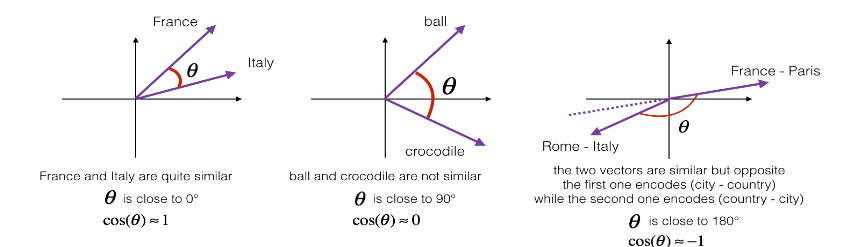

<b>Figure 1</b>: The cosine of the angle between two vectors is a measure of their similarity.</font></center></caption>

<a name='ex-1'></a>
### Exercise 1 - cosine_similarity

Implement the function `cosine_similarity()` to evaluate the similarity between word vectors.

**Reminder**: The norm of $u$ is defined as $ ||u||_2 = \sqrt{\sum_{i=1}^{n} u_i^2}$

#### Additional Hints
* You may find [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html), [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), or [np.sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) useful depending upon the implementation that you choose.

In [ ]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: cosine_similarity

def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similarity between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    # Special case. Consider the case u = [0, 0], v=[0, 0]
    if np.all(u == v):
        return 1
    
    ### START CODE HERE ###
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u,v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.sqrt(np.sum(u**2))
    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.sqrt(np.sum(v**2))
    
    # Avoid division by 0
    if np.isclose(norm_u * norm_v, 0, atol=1e-32):
        return 0
    
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot/(norm_u*norm_v)
    ### END CODE HERE ###
    
    return cosine_similarity

In [ ]:
# START SKIP FOR GRADING
father = word_to_vec_map["father"]
mother = word_to_vec_map["mother"]
ball = word_to_vec_map["ball"]
crocodile = word_to_vec_map["crocodile"]
france = word_to_vec_map["france"]
italy = word_to_vec_map["italy"]
paris = word_to_vec_map["paris"]
rome = word_to_vec_map["rome"]

print("cosine_similarity(father, mother) = ", cosine_similarity(father, mother))
print("cosine_similarity(ball, crocodile) = ",cosine_similarity(ball, crocodile))
print("cosine_similarity(france - paris, rome - italy) = ",cosine_similarity(france - paris, rome - italy))
# END SKIP FOR GRADING

# PUBLIC TESTS
def cosine_similarity_test(target):
    a = np.random.uniform(-10, 10, 10)
    b = np.random.uniform(-10, 10, 10)
    c = np.random.uniform(-1, 1, 23)
        
    assert np.isclose(cosine_similarity(a, a), 1), "cosine_similarity(a, a) must be 1"
    assert np.isclose(cosine_similarity((c >= 0) * 1, (c < 0) * 1), 0), "cosine_similarity(a, not(a)) must be 0"
    assert np.isclose(cosine_similarity(a, -a), -1), "cosine_similarity(a, -a) must be -1"
    assert np.isclose(cosine_similarity(a, b), cosine_similarity(a * 2, b * 4)), "cosine_similarity must be scale-independent. You must divide by the product of the norms of each input"

    print("\033[92mAll test passed!")
    
cosine_similarity_test(cosine_similarity)

cosine_similarity(father, mother) =  0.8909038442893615
cosine_similarity(ball, crocodile) =  0.2743924626137942
cosine_similarity(france - paris, rome - italy) =  -0.6751479308174201
All test passed!


<a name='4'></a>
## 4 - Word Analogy Task

* In the word analogy task, complete this sentence:  
    <font color='brown'>"*a* is to *b* as *c* is to **____**"</font>. 

* An example is:  
    <font color='brown'> '*man* is to *woman* as *king* is to *queen*' </font>. 

* You're trying to find a word *d*, such that the associated word vectors $e_a, e_b, e_c, e_d$ are related in the following manner:   
    $e_b - e_a \approx e_d - e_c$
* Measure the similarity between $e_b - e_a$ and $e_d - e_c$ using cosine similarity. 

<a name='ex-2'></a>
### Exercise 2 - complete_analogy

Complete the code below to perform word analogies!

In [ ]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: complete_analogy

def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____. 
    
    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    word_to_vec_map -- dictionary that maps words to their corresponding vectors. 
    
    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """
    
    # convert words to lowercase
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    ### START CODE HERE ###
    # Get the word embeddings e_a, e_b and e_c (≈1-3 lines)
    e_a, e_b, e_c = word_to_vec_map.get(word_a),word_to_vec_map.get(word_b), word_to_vec_map.get(word_c)
    ### END CODE HERE ###
    
    words = word_to_vec_map.keys()
    max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
    best_word = None         # Initialize best_word with None, it will help keep track of the word to output
    
    # loop over the whole word vector set
    for w in words:   
        # to avoid best_word being one the input words, skip the input word_c
        # skip word_c from query
        if w == word_c:
            continue
        
        ### START CODE HERE ###
        # Compute cosine similarity between the vector (e_b - e_a) and the vector ((w's vector representation) - e_c)  (≈1 line)
        cosine_sim = cosine_similarity(np.subtract(e_b,e_a), np.subtract(word_to_vec_map.get(w),e_c))
        
        # If the cosine_sim is more than the max_cosine_sim seen so far,
            # then: set the new max_cosine_sim to the current cosine_sim and the best_word to the current word (≈3 lines)
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        ### END CODE HERE ###
        
    return best_word

In [ ]:
# PUBLIC TEST
def complete_analogy_test(target):
    a = [3, 3] # Center at a
    a_nw = [2, 4] # North-West oriented vector from a
    a_s = [3, 2] # South oriented vector from a
    
    c = [-2, 1] # Center at c
    # Create a controlled word to vec map
    word_to_vec_map = {'a': a,
                       'synonym_of_a': a,
                       'a_nw': a_nw, 
                       'a_s': a_s, 
                       'c': c, 
                       'c_n': [-2, 2], # N
                       'c_ne': [-1, 2], # NE
                       'c_e': [-1, 1], # E
                       'c_se': [-1, 0], # SE
                       'c_s': [-2, 0], # S
                       'c_sw': [-3, 0], # SW
                       'c_w': [-3, 1], # W
                       'c_nw': [-3, 2] # NW
                      }
    
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
            
    assert(target('a', 'a_nw', 'c', word_to_vec_map) == 'c_nw')
    assert(target('a', 'a_s', 'c', word_to_vec_map) == 'c_s')
    assert(target('a', 'synonym_of_a', 'c', word_to_vec_map) != 'c'), "Best word cannot be input query"
    assert(target('a', 'c', 'a', word_to_vec_map) == 'c')

    print("\033[92mAll tests passed")
    
complete_analogy_test(complete_analogy)

All tests passed


In [ ]:
# START SKIP FOR GRADING
triads_to_try = [('italy', 'italian', 'spain'), ('india', 'delhi', 'japan'), ('man', 'woman', 'boy'), ('small', 'smaller', 'large')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad, word_to_vec_map)))

# END SKIP FOR GRADING

italy -> italian :: spain -> spanish
india -> delhi :: japan -> tokyo
man -> woman :: boy -> girl
small -> smaller :: large -> smaller


Once you get the output, try modifying the input cells above to test your own analogies. 

**Hint**: Try to find some other analogy pairs that will work, along with some others where the algorithm doesn't give the right answer:
    * For example, you can try small->smaller as big->?

## Congratulations!

You've come to the end of the graded portion of the assignment. By now, you've: 

* Loaded some pre-trained word vectors
* Measured the similarity between word vectors using cosine similarity
* Used word embeddings to solve word analogy problems such as Man is to Woman as King is to __.

Cosine similarity is a relatively simple and intuitive, yet powerful, method you can use to capture nuanced relationships between words. These exercises should be helpful to you in explaining how it works, and applying it to your own projects!  

<font color='blue'>
    <b>What you should remember</b>:

- Cosine similarity is a good way to compare the similarity between pairs of word vectors.
    - Note that L2 (Euclidean) distance also works.
- For NLP applications, using a pre-trained set of word vectors is often a great way to get started. </font>

Even though you've finished the graded portion, please take a look at the rest of this notebook to learn about debiasing word vectors.

<a name='5'></a>
## 5 - Debiasing Word Vectors (OPTIONAL/UNGRADED) 

In the following exercise, you'll examine gender biases that can be reflected in a word embedding, and explore algorithms for reducing the bias. In addition to learning about the topic of debiasing, this exercise will also help hone your intuition about what word vectors are doing. This section involves a bit of linear algebra, though you can certainly complete it without being an expert! Go ahead and give it a shot. This portion of the notebook is optional and is not graded...so just have fun and explore.  

First, see how the GloVe word embeddings relate to gender. You'll begin by computing a vector $g = e_{woman}-e_{man}$, where $e_{woman}$ represents the word vector corresponding to the word *woman*, and $e_{man}$ corresponds to the word vector corresponding to the word *man*. The resulting vector $g$ roughly encodes the concept of "gender". 

You might get a more accurate representation if you compute $g_1 = e_{mother}-e_{father}$, $g_2 = e_{girl}-e_{boy}$, etc. and average over them, but just using $e_{woman}-e_{man}$ will give good enough results for now.

In [ ]:
g = word_to_vec_map['woman'] - word_to_vec_map['man']
print(g)

[-0.087144    0.2182     -0.40986    -0.03922    -0.1032      0.94165
 -0.06042     0.32988     0.46144    -0.35962     0.31102    -0.86824
  0.96006     0.01073     0.24337     0.08193    -1.02722    -0.21122
  0.695044   -0.00222     0.29106     0.5053     -0.099454    0.40445
  0.30181     0.1355     -0.0606     -0.07131    -0.19245    -0.06115
 -0.3204      0.07165    -0.13337    -0.25068714 -0.14293    -0.224957
 -0.149       0.048882    0.12191    -0.27362    -0.165476   -0.20426
  0.54376    -0.271425   -0.10245    -0.32108     0.2516     -0.33455
 -0.04371     0.01258   ]


In [ ]:
print ('List of names and their similarities with constructed vector:')

# girls and boys name
name_list = ['john', 'marie', 'sophie', 'ronaldo', 'priya', 'rahul', 'danielle', 'reza', 'katy', 'yasmin']

for w in name_list:
    print (w, cosine_similarity(word_to_vec_map[w], g))

List of names and their similarities with constructed vector:
john -0.23163356145973724
marie 0.315597935396073
sophie 0.31868789859418784
ronaldo -0.31244796850329437
priya 0.17632041839009402
rahul -0.16915471039231716
danielle 0.24393299216283895
reza -0.07930429672199553
katy 0.2831068659572615
yasmin 0.23313857767928758


Do you notice anything surprising? It is astonishing how these results reflect certain unhealthy gender stereotypes. For example, we see “computer” is negative and is closer in value to male first names, while “literature” is positive and is closer to female first names. Ouch! 

You'll see below how to reduce the bias of these vectors, using an algorithm due to [Boliukbasi et al., 2016](https://arxiv.org/abs/1607.06520). Note that some word pairs such as "actor"/"actress" or "grandmother"/"grandfather" should remain gender-specific, while other words such as "receptionist" or "technology" should be neutralized, i.e. not be gender-related. You'll have to treat these two types of words differently when debiasing.

<a name='5-1'></a>
### 5.1 - Neutralize Bias for Non-Gender Specific Words 

The figure below should help you visualize what neutralizing does. If you're using a 50-dimensional word embedding, the 50 dimensional space can be split into two parts: The bias-direction $g$, and the remaining 49 dimensions, which is called $g_{\perp}$ here. In linear algebra, we say that the 49-dimensional $g_{\perp}$ is perpendicular (or "orthogonal") to $g$, meaning it is at 90 degrees to $g$. The neutralization step takes a vector such as $e_{receptionist}$ and zeros out the component in the direction of $g$, giving us $e_{receptionist}^{debiased}$. 

Even though $g_{\perp}$ is 49-dimensional, given the limitations of what you can draw on a 2D screen, it's illustrated using a 1-dimensional axis below. 

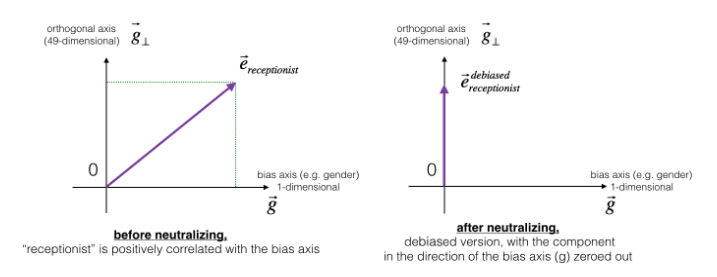

<b>Figure 2</b>: The word vector for "receptionist" represented before and after applying the neutralize operation.</font> </center></caption>

<a name='ex-3'></a>
### Exercise 3 - neutralize

Implement `neutralize()` to remove the bias of words such as "receptionist" or "scientist."

Given an input embedding $e$, you can use the following formulas to compute $e^{debiased}$: 

$$e^{bias\_component} = \frac{e \cdot g}{||g||_2^2} * g\tag{2}$$
$$e^{debiased} = e - e^{bias\_component}\tag{3}$$

If you are an expert in linear algebra, you may recognize $e^{bias\_component}$ as the projection of $e$ onto the direction $g$. If you're not an expert in linear algebra, don't worry about this. ;) 

<!-- 
**Reminder**: a vector $u$ can be split into two parts: its projection over a vector-axis $v_B$ and its projection over the axis orthogonal to $v$:
$$u = u_B + u_{\perp}$$
where : $u_B = $ and $ u_{\perp} = u - u_B $
!--> 

In [ ]:
def neutralize(word, g, word_to_vec_map):
    """
    Removes the bias of "word" by projecting it on the space orthogonal to the bias axis. 
    This function ensures that gender neutral words are zero in the gender subspace.
    
    Arguments:
        word -- string indicating the word to debias
        g -- numpy-array of shape (50,), corresponding to the bias axis (such as gender)
        word_to_vec_map -- dictionary mapping words to their corresponding vectors.
    
    Returns:
        e_debiased -- neutralized word vector representation of the input "word"
    """
    
    ### START CODE HERE ###
    # Select word vector representation of "word". Use word_to_vec_map. (≈ 1 line)
    e = word_to_vec_map.get(word)
    
    # Compute e_biascomponent using the formula given above. (≈ 1 line)
    e_biascomponent = (np.dot(e,g)/np.sqrt(np.sum(g**2)))*g
 
    # Neutralize e by subtracting e_biascomponent from it 
    # e_debiased should be equal to its orthogonal projection. (≈ 1 line)
    e_debiased = e-e_biascomponent
    ### END CODE HERE ###
    
    return e_debiased

In [ ]:
e = "receptionist"
print("cosine similarity between " + e + " and g, before neutralizing: ", cosine_similarity(word_to_vec_map["receptionist"], g))



cosine similarity between receptionist and g, before neutralizing:  0.33077941750593737


<a name='5-2'></a>
### 5.2 - Equalization Algorithm for Gender-Specific Words

Next, let's see how debiasing can also be applied to word pairs such as "actress" and "actor." Equalization is applied to pairs of words that you might want to have differ only through the gender property. As a concrete example, suppose that "actress" is closer to "babysit" than "actor." By applying neutralization to "babysit," you can reduce the gender stereotype associated with babysitting. But this still does not guarantee that "actor" and "actress" are equidistant from "babysit." The equalization algorithm takes care of this. 

The key idea behind equalization is to make sure that a particular pair of words are equidistant from the 49-dimensional $g_\perp$. The equalization step also ensures that the two equalized steps are now the same distance from $e_{receptionist}^{debiased}$, or from any other work that has been neutralized. Visually, this is how equalization works: 

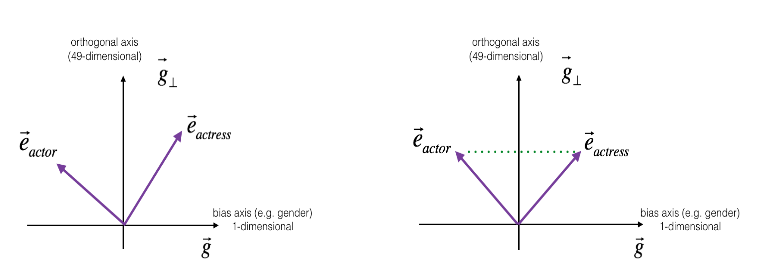

The derivation of the linear algebra to do this is a bit more complex. (See Bolukbasi et al., 2016 in the References for details.) Here are the key equations: 


$$ \mu = \frac{e_{w1} + e_{w2}}{2}\tag{4}$$ 

$$ \mu_{B} = \frac {\mu \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{5}$$ 

$$\mu_{\perp} = \mu - \mu_{B} \tag{6}$$

$$ e_{w1B} = \frac {e_{w1} \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{7}$$ 
$$ e_{w2B} = \frac {e_{w2} \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{8}$$


$$e_{w1B}^{corrected} = \sqrt{ |{1 - ||\mu_{\perp} ||^2_2} |} * \frac{e_{\text{w1B}} - \mu_B} {||(e_{w1} - \mu_{\perp}) - \mu_B||_2} \tag{9}$$


$$e_{w2B}^{corrected} = \sqrt{ |{1 - ||\mu_{\perp} ||^2_2} |} * \frac{e_{\text{w2B}} - \mu_B} {||(e_{w2} - \mu_{\perp}) - \mu_B||_2} \tag{10}$$

$$e_1 = e_{w1B}^{corrected} + \mu_{\perp} \tag{11}$$
$$e_2 = e_{w2B}^{corrected} + \mu_{\perp} \tag{12}$$


<a name='ex-4'></a>
### Exercise 4 - equalize

Implement the `equalize()` function below. 

Use the equations above to get the final equalized version of the pair of words. Good luck!

**Hint**
- Use [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

In [ ]:
def equalize(pair, bias_axis, word_to_vec_map):
    """
    Debias gender specific words by following the equalize method described in the figure above.
    
    Arguments:
    pair -- pair of strings of gender specific words to debias, e.g. ("actress", "actor") 
    bias_axis -- numpy-array of shape (50,), vector corresponding to the bias axis, e.g. gender
    word_to_vec_map -- dictionary mapping words to their corresponding vectors
    
    Returns
    e_1 -- word vector corresponding to the first word
    e_2 -- word vector corresponding to the second word
    """
    
    ### START CODE HERE ###
    # Step 1: Select word vector representation of "word". Use word_to_vec_map. (≈ 2 lines)
    w1, w2 = pair[0], pair[1]
    e_w1, e_w2 = word_to_vec_map.get(w1),word_to_vec_map.get(w2)
    
    # Step 2: Compute the mean of e_w1 and e_w2 (≈ 1 line)
    mu = (e_w1+e_w2)/2

    # Step 3: Compute the projections of mu over the bias axis and the orthogonal axis (≈ 2 lines)
    mu_B = (np.dot(mu, bias_axis)/np.linalg.norm(bias_axis)**2)*bias_axis
    mu_orth = mu - mu_B

    # Step 4: Use equations (7) and (8) to compute e_w1B and e_w2B (≈2 lines)
    e_w1B = (np.dot(e_w1, bias_axis)*np.linalg.norm(bias_axis)**2)*bias_axis
    e_w2B = (np.dot(e_w2, bias_axis)*np.linalg.norm(bias_axis)**2)*bias_axis
        
    # Step 5: Adjust the Bias part of e_w1B and e_w2B using the formulas (9) and (10) given above (≈2 lines)
    corrected_e_w1B = np.sqrt(1 - np.linalg.norm(mu_orth)**2)*((e_w1B - mu_B)/np.abs((e_w1 - mu_orth) - mu_B))
    corrected_e_w2B = np.sqrt(1 - np.linalg.norm(mu_orth)**2)*((e_w2B - mu_B)/np.abs((e_w2 - mu_orth) - mu_B))

    # Step 6: Debias by equalizing e1 and e2 to the sum of their corrected projections (≈2 lines)
    e1 = corrected_e_w1B + mu_orth
    e2 = corrected_e_w2B + mu_orth
                                                                
    ### END CODE HERE ###
    
    return e1, e2

In [ ]:
print("cosine similarities before equalizing:")
print("cosine_similarity(word_to_vec_map[\"man\"], gender) = ", cosine_similarity(word_to_vec_map["man"], g))
print("cosine_similarity(word_to_vec_map[\"woman\"], gender) = ", cosine_similarity(word_to_vec_map["woman"], g))
print()
e1, e2 = equalize(("man", "woman"), g, word_to_vec_map)
print("cosine similarities after equalizing:")
print("cosine_similarity(e1, gender) = ", cosine_similarity(e1, g))
print("cosine_similarity(e2, gender) = ", cosine_similarity(e2, g))

cosine similarities before equalizing:
cosine_similarity(word_to_vec_map["man"], gender) =  -0.11711095765336832
cosine_similarity(word_to_vec_map["woman"], gender) =  0.35666618846270376

cosine similarities after equalizing:
cosine_similarity(e1, gender) =  nan
cosine_similarity(e2, gender) =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


Go ahead and play with the input words in the cell above, to apply equalization to other pairs of words. 

Hint: Try...

These debiasing algorithms are very helpful for reducing bias, but aren't perfect and don't eliminate all traces of bias. For example, one weakness of this implementation was that the bias direction $g$ was defined using only the pair of words _woman_ and _man_. As discussed earlier, if $g$ were defined by computing $g_1 = e_{woman} - e_{man}$; $g_2 = e_{mother} - e_{father}$; $g_3 = e_{girl} - e_{boy}$; and so on and averaging over them, you would obtain a better estimate of the "gender" dimension in the 50 dimensional word embedding space. Feel free to play with these types of variants as well! 

### Congratulations!

You have come to the end of both graded and ungraded portions of this notebook, and have seen several of the ways that word vectors can be applied and  modified. Great work pushing your knowledge in the areas of neutralizing and equalizing word vectors! See you next time.

<a name='6'></a>
## 6 - References

- The debiasing algorithm is from Bolukbasi et al., 2016, [Man is to Computer Programmer as Woman is to
Homemaker? Debiasing Word Embeddings](https://papers.nips.cc/paper/6228-man-is-to-computer-programmer-as-woman-is-to-homemaker-debiasing-word-embeddings.pdf)
- The GloVe word embeddings were due to Jeffrey Pennington, Richard Socher, and Christopher D. Manning. (https://nlp.stanford.edu/projects/glove/)